<a href="https://colab.research.google.com/github/A16S10/Customer_Response_Prediction/blob/main/Model_training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Customer Response Prediction to marketing campaign**

##Objective of Project

Objective of this project is to correctly predict response of customers for marketing campaign.Response prediction model can be done by using differnt machine learning classification algorithms.
This project aims to leverage customer behavior and buying patterns to predict their engagement with future marketing campaigns. By employing exploratory data analysis (EDA) and robust machine learning classification algorithms, we will unveil hidden insights in customer behavior, enabling us to target campaigns with laser-sharp precision. This translates to higher engagement, deeper customer relationships, and optimized marketing ROI.



 🎉

##About the Dataset



Here's the link to the [dataset](https://docs.google.com/spreadsheets/d/12ln9iTNcVNOMYi_AU-OczKpa_KIP8XyVbsjk81Na8Yk/edit?usp=sharing)


This data was gathered during last year's campaign.
Data description is as follows;

1. Response (target) - 1 if customer accepted the offer in the last campaign, 0 otherwise
1. ID - Unique ID of each customer
1. Year_Birth - Age of the customer
1. Complain - 1 if the customer complained in the last 2 years
1. Dt_Customer - date of customer's enrollment with the company
1. Education - customer's level of education
1. Marital - customer's marital status
1. Kidhome - number of small children in customer's household
1. Teenhome - number of teenagers in customer's household
1. Income - customer's yearly household income
1. MntFishProducts - the amount spent on fish products in the last 2 years
1. MntMeatProducts - the amount spent on meat products in the last 2 years
1. MntFruits - the amount spent on fruits products in the last 2 years
1. MntSweetProducts - amount spent on sweet products in the last 2 years
1. MntWines - the amount spent on wine products in the last 2 years
1. MntGoldProds - the amount spent on gold products in the last 2 years
1. NumDealsPurchases - number of purchases made with discount
1. NumCatalogPurchases - number of purchases made using catalog (buying goods to be shipped through the mail)
1. NumStorePurchases - number of purchases made directly in stores
1. NumWebPurchases - number of purchases made through the company's website
1. NumWebVisitsMonth - number of visits to company's website in the last month
1. Recency - number of days since the last purchase





##Basic CleanUp

- **Clean and preprocess the dataset (handling missing values, data types, etc.).**

- **Analyze the distribution of customer demographics (age, education, marital status) using descriptive statistics and visualizations.**


**Deliverables**:

- **Cleaned and Preprocessed Dataset**:

  Provide a detailed report on the steps taken to handle missing values, including imputation methods used if applicable.
  Document the process of ensuring consistent data types for each variable, addressing any inconsistencies.

- **Summary of Basic Statistics**:

  Present calculated statistics such as mean, median, variance, and standard deviation for each relevant numerical variable.
  Include a concise table or summary showcasing these measures for easy reference.

In [9]:
# To help with reading and manipulating data
import pandas as pd
import numpy as np

# To help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.colors as mcolors

# importing random oversampler
from imblearn.over_sampling import RandomOverSampler

#importing libraries for data modelling
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics

# To supress warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

<b>The initial steps to get an overview of any dataset is to:

1.observe the first few rows of the dataset, to check whether the dataset has
been loaded properly or not

2.get information about the number of rows and columns in the dataset

3.find out the data types of the columns to ensure that data is stored in the preferred format and the value of each property is as expected.

4.check the statistical summary of the dataset to get an overview of the numerical columns of the data.


In [12]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [13]:
#Loading the Dataset
data=pd.read_csv('/content/drive/MyDrive/Datsets/Superstore Marketing Data - Sheet1.csv')

In [14]:
#Taking first 5 rows from dataset
data.head()

,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/2014,0,189,...,111,189,218,1,4,4,6,1,1,0
1,1,1961,Graduation,Single,57091.0,0,0,6/15/2014,0,464,...,7,0,37,1,7,3,7,5,1,0
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/2014,0,134,...,15,2,30,1,3,2,5,2,0,0
3,1386,1967,Graduation,Together,32474.0,1,1,########,0,10,...,0,0,0,1,1,0,2,7,0,0
4,5371,1989,Graduation,Single,21474.0,1,0,########,0,6,...,11,0,34,2,3,1,2,7,1,0


In [15]:
#Taking last 5 rows from dataset
data.tail()

,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
2235,10142,1976,PhD,Divorced,66476.0,0,1,########,99,372,...,47,48,78,2,5,2,11,4,0,0
2236,5263,1977,2n Cycle,Married,31056.0,1,0,1/22/2013,99,5,...,3,8,16,1,1,0,3,8,0,0
2237,22,1976,Graduation,Divorced,46310.0,1,0,########,99,185,...,15,5,14,2,6,1,5,8,0,0
2238,528,1978,Graduation,Married,65819.0,0,0,11/29/2012,99,267,...,149,165,63,1,5,4,10,3,0,0
2239,4070,1969,PhD,Married,94871.0,0,2,########,99,169,...,188,0,144,1,8,5,4,7,1,0


In [16]:
#Taking info about dataset to check consistency of dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

<b>There are a total of 22 columns and 2,240 observations in the dataset We can see that income column has null values Dt_Customer should be date type

In [17]:
#statistical summery of dataset
data.describe()

,Id,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.149107,0.009375
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.356274,0.096391
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000


**Observations:**

<b>1.Year_Birth has a large range of values i.e. 1893 to 1996.

2.The birth year <=1900 is some users.. It's very unlikely that the person is alive. It may be a reporting error. We will explore this further.

3.Income has a max value of 666666 which is far greater than the mean and could be an outlier.

4.Columns - Income, MntFruits, MntWines, MntMeatProducts, MntFishProducts, MntSweetProducts might have outliers on the right end as there is a large difference between 75th percentile and maximum values.

5.Recency has an approx equal mean and median which is equal to 49 days.
Highest mean amount spent per customer in the last two years is on wines (approx 304), followed by meat products (approx 167).

6.There are only 20 customers who complained in the last two years.

7.In 'Response' we have 1903 observations for the 0 class but only 334 observations for class 1.

8.There are only three years in the customer registration data.

In [18]:
data.isna().sum()

Id                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
Response                0
Complain                0
dtype: int64

<b> We have 24 blank values in Income column.

In [19]:
# Filling blank values with median values of income group
data['Income']=data['Income'].fillna(data['Income'].median())

In [20]:
data.isna().sum()

Id                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
Response               0
Complain               0
dtype: int64

<b> No blank values in dataset now.

In [21]:
# chhanging datatypes fo consistency throughout
data['Education']=data['Education'].astype('string')
data['Marital_Status']=data['Marital_Status'].astype('string')

In [22]:
data.dtypes

Id                       int64
Year_Birth               int64
Education               string
Marital_Status          string
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
Response                 int64
Complain                 int64
dtype: object

In [23]:
# Drop duplicates from dataset
data=data.drop_duplicates()

In [24]:
# checking shape of dataset
data.shape

(2240, 22)

<b> We have 22 attributes and 2240 rows in the dataset

In [25]:
# Dropping redundant column  from dataset
data=data.drop(['Id'],axis=1)

In [26]:
# Again checking shape of dataset
data.shape

(2240, 21)

In [27]:
# Printing list of all column names
columns_list=[columns for columns in data.columns]
print(columns_list)

['Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'Response', 'Complain']


In [28]:
# Adding 2 more columns total_expenditure and total_purchase for drawing insights
cols=['MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds']
data['Total_Spend']=data[cols].sum(axis=1)

purchase=['NumDealsPurchases','NumWebPurchases','NumCatalogPurchases','NumStorePurchases']
data['Total_Purchase']=data[purchase].sum(axis=1)

In [29]:
data

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain,Total_Spend,Total_Purchase
0,1970,Graduation,Divorced,84835.0,0,0,6/16/2014,0,189,104,...,218,1,4,4,6,1,1,0,1190,15
1,1961,Graduation,Single,57091.0,0,0,6/15/2014,0,464,5,...,37,1,7,3,7,5,1,0,577,18
2,1958,Graduation,Married,67267.0,0,1,5/13/2014,0,134,11,...,30,1,3,2,5,2,0,0,251,11
3,1967,Graduation,Together,32474.0,1,1,########,0,10,0,...,0,1,1,0,2,7,0,0,11,4
4,1989,Graduation,Single,21474.0,1,0,########,0,6,16,...,34,2,3,1,2,7,1,0,91,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,1976,PhD,Divorced,66476.0,0,1,########,99,372,18,...,78,2,5,2,11,4,0,0,689,20
2236,1977,2n Cycle,Married,31056.0,1,0,1/22/2013,99,5,10,...,16,1,1,0,3,8,0,0,55,5
2237,1976,Graduation,Divorced,46310.0,1,0,########,99,185,2,...,14,2,6,1,5,8,0,0,309,14
2238,1978,Graduation,Married,65819.0,0,0,11/29/2012,99,267,38,...,63,1,5,4,10,3,0,0,1383,20


<b>In education, 2n cycle and Master means the same thing. We can combine these two categories.

There are many categories in marital status. We can combine the categories 'Alone', 'Absurd' and 'YOLO' with 'Single' and 'Together' categories with 'Married'.

In [30]:
# Replacing equivalent values with suitable values
print(data.Marital_Status.unique())

print(data.Education.unique())

data['Marital_Status']=data['Marital_Status'].replace(['Married','Together'],'Couple')

data['Marital_Status']=data['Marital_Status'].replace(['Divorced','Single','Widow','YOLO','Alone','Absurd'],'Single')

data['Education']=data['Education'].replace('2n Cycle','Master')

data['Dt_Customer']=data['Dt_Customer'].replace('########','Not Available')

<StringArray>
['Divorced', 'Single', 'Married', 'Together', 'Widow', 'YOLO', 'Alone',
 'Absurd']
Length: 8, dtype: string
<StringArray>
['Graduation', 'PhD', '2n Cycle', 'Master', 'Basic']
Length: 5, dtype: string


In [31]:
print(data.Marital_Status.unique())

<StringArray>
['Single', 'Couple']
Length: 2, dtype: string


In [32]:
print(data.Education.unique())

<StringArray>
['Graduation', 'PhD', 'Master', 'Basic']
Length: 4, dtype: string


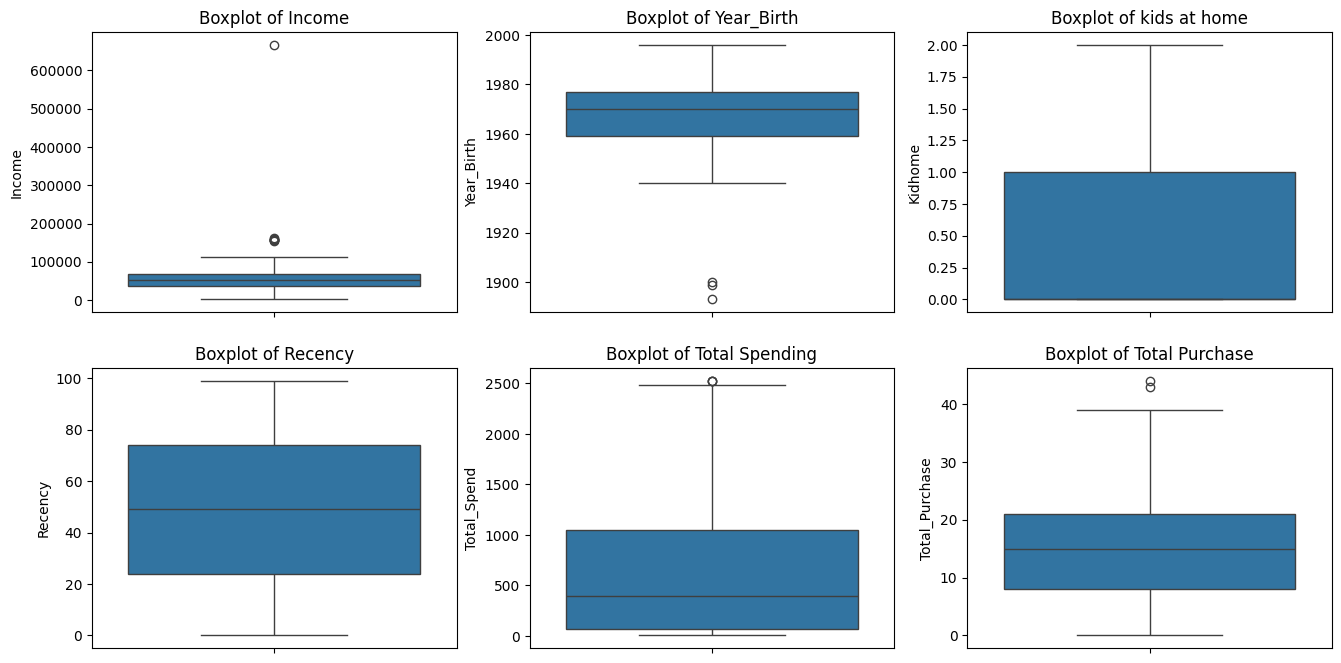

In [33]:
#Boxplot for checking outliers if exists in relevent columns

fig, axs = plt.subplots(2,3, figsize=(16, 8))

sns.boxplot(data['Income'], ax=axs[0, 0])
axs[0, 0].set_title('Boxplot of Income')

sns.boxplot(data['Year_Birth'], ax=axs[0, 1])
axs[0, 1].set_title('Boxplot of Year_Birth')


sns.boxplot(data['Kidhome'], ax=axs[0, 2])
axs[0, 2].set_title('Boxplot of kids at home')

sns.boxplot(data['Recency'], ax=axs[1,0])
axs[1, 0].set_title('Boxplot of Recency')

sns.boxplot(data['Total_Spend'], ax=axs[1, 1])
axs[1,1].set_title('Boxplot of Total Spending')

sns.boxplot(data['Total_Purchase'], ax=axs[1,2])
axs[1,2].set_title('Boxplot of Total Purchase')



plt.show()


<b>Removing outliers from Income and Age column

In [34]:
print("Old Shape: ", data.shape)

''' Detection '''
# IQR
# Calculate the upper and lower limits
Q1 = data['Income'].quantile(0.25)
Q3 = data['Income'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

# Create arrays of Boolean values indicating the outlier rows
upper_array = np.where(data['Income']>=upper)[0]
lower_array = np.where(data['Income']<=lower)[0]

# Removing the outliers
data.drop(index=upper_array, inplace=True)
data.drop(index=lower_array, inplace=True)

# Print the new shape of the DataFrame
print("New Shape: ", data.shape)

Old Shape:  (2240, 23)
New Shape:  (2232, 23)


In [35]:
data['Age']=2023-data['Year_Birth']
data

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain,Total_Spend,Total_Purchase,Age
0,1970,Graduation,Single,84835.0,0,0,6/16/2014,0,189,104,...,1,4,4,6,1,1,0,1190,15,53
1,1961,Graduation,Single,57091.0,0,0,6/15/2014,0,464,5,...,1,7,3,7,5,1,0,577,18,62
2,1958,Graduation,Couple,67267.0,0,1,5/13/2014,0,134,11,...,1,3,2,5,2,0,0,251,11,65
3,1967,Graduation,Couple,32474.0,1,1,Not Available,0,10,0,...,1,1,0,2,7,0,0,11,4,56
4,1989,Graduation,Single,21474.0,1,0,Not Available,0,6,16,...,2,3,1,2,7,1,0,91,8,34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,1976,PhD,Single,66476.0,0,1,Not Available,99,372,18,...,2,5,2,11,4,0,0,689,20,47
2236,1977,Master,Couple,31056.0,1,0,1/22/2013,99,5,10,...,1,1,0,3,8,0,0,55,5,46
2237,1976,Graduation,Single,46310.0,1,0,Not Available,99,185,2,...,2,6,1,5,8,0,0,309,14,47
2238,1978,Graduation,Couple,65819.0,0,0,11/29/2012,99,267,38,...,1,5,4,10,3,0,0,1383,20,45


In [36]:
print(data.Age.max())
print(data.Age.min())

130
27


<b>We can see that there are few observations with ages greater than 100 which is highly unlikely to be true.

We can drop the observations with age greater than 100

In [37]:
print('Old Shape:',data.shape)

# column Age has value >= 100

index_names = data[ (data['Age'] >=100)].index

# drop these given row
# indexes from dataFrame
data.drop(index_names, inplace = True)
print('New Shape:',data.shape)


Old Shape: (2232, 24)
New Shape: (2229, 24)


##Descriptive Statistics 📊

- **Calculate measures of central tendency (mean, median, mode) and measures of dispersion (variance, standard deviation) for key variables. Identify and handle outliers if necessary.**


**Deliverables**:

- **Descriptive statistics that reveal the central tendencies, variations, and potential outliers in the dataset.**:

  

In [38]:
# Measuting central tendency and dispersion of all relevant columns
data_median=data.median(numeric_only=True)
data_mean=data.mean(numeric_only=True)
data_mean=data_mean.round(2)
data_standard_deviation=data.std(numeric_only=True)
data_standard_deviation.round(2)
data_variance=data.var(numeric_only=True)
data_variance=data_variance.round(2)


matrix_dict={'Mean':data_mean,'Median':data_median,'Std_Deviation':data_standard_deviation,'Variance':data_variance}

dataframe=pd.concat(matrix_dict,axis=1)
dataframe

,Mean,Median,Std_Deviation,Variance
Year_Birth,1968.89,1970.0,11.707430,1.370600e+02
Income,51619.50,51381.5,20601.216248,4.244101e+08
Kidhome,0.44,0.0,0.538636,2.900000e-01
Teenhome,0.51,0.0,0.544735,3.000000e-01
Recency,49.11,49.0,28.946476,8.379000e+02
MntWines,304.99,176.0,336.761943,1.134086e+05
MntFruits,26.35,8.0,39.764060,1.581180e+03
MntMeatProducts,165.28,67.0,219.336589,4.810854e+04
MntFishProducts,37.64,12.0,54.700548,2.992150e+03
MntSweetProducts,27.16,8.0,41.338945,1.708910e+03


##Probability Distributions 🎲

- **Identify variables that could follow specific probability distributions (e.g., Binomial, Normal). Calculate probabilities and expected values based on these distributions.**



**Deliverables**:

- **Determination of suitable probability distributions for relevant variables and corresponding calculated probabilities and expected values.**:

  

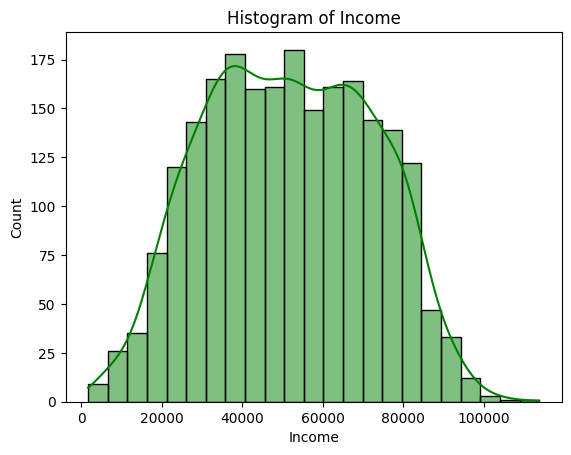

Probability:
51381.5    0.010767
7500.0     0.005384
35860.0    0.001795
83844.0    0.001346
63841.0    0.001346
             ...   
61346.0    0.000449
46086.0    0.000449
42243.0    0.000449
35788.0    0.000449
94871.0    0.000449
Name: Income, Length: 1964, dtype: float64

Expected value:
51619.5042620009


In [39]:
sns.histplot(data['Income'], kde = True,color='green')
plt.title('Histogram of Income')
plt.show()


# Calculate the probability of each income
probability = data['Income'].value_counts(normalize=True)

# Calculate the expected value
expected_value = data['Income'].mean()

# Print the results
print("Probability:")
print(probability)

print("\nExpected value:")
print(expected_value)

<b>Above income histplot is multimodal.

Expected income is around 50000 USD.This is higher income group.

From age and income group we can say that this customers are well off.

 With right marketing Technique and campaigns. Superstore can generate revenue.

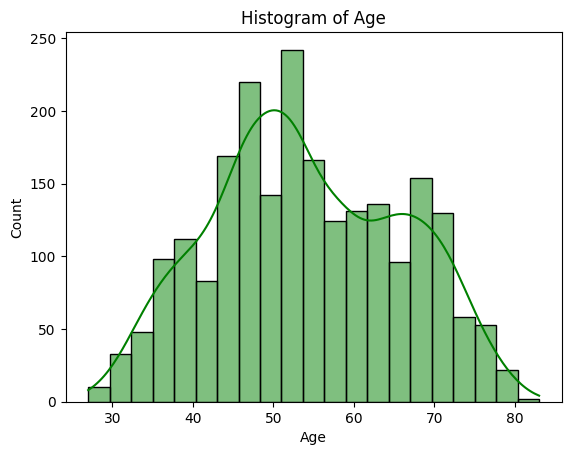

Probability:
47    0.039480
52    0.038582
48    0.036788
51    0.035442
53    0.034545
45    0.034545
58    0.033199
50    0.032750
54    0.031853
49    0.030956
67    0.024675
44    0.023777
65    0.023777
71    0.023329
64    0.022880
55    0.022880
69    0.022432
57    0.022432
46    0.022432
63    0.021983
68    0.021983
60    0.020188
56    0.019740
41    0.019740
61    0.019740
72    0.019291
66    0.019291
59    0.018843
40    0.018843
37    0.018843
43    0.017497
42    0.017497
39    0.017048
62    0.016151
70    0.015702
38    0.014356
34    0.013459
73    0.013010
35    0.013010
74    0.013010
36    0.012113
75    0.009421
33    0.008075
77    0.007178
76    0.007178
32    0.006729
31    0.005832
78    0.003589
79    0.003140
80    0.003140
30    0.002243
28    0.002243
29    0.001346
27    0.000897
82    0.000449
83    0.000449
Name: Age, dtype: float64

Expected value:
54.11126065500224


In [40]:
sns.histplot(data['Age'], kde = True,color='green')
plt.title('Histogram of Age')
plt.show()


# Calculate the probability of each income
probability = data['Age'].value_counts(normalize=True)

# Calculate the expected value
expected_value = data['Age'].mean()

# Print the results
print("Probability:")
print(probability)

print("\nExpected value:")
print(expected_value)

<b>Above is multimodal histplot.It is left skewwed.Expected value is 54.This graph is heavy o right side.This means majority of cutomers have age more than 50.As this is not working force,they might not have will to spend all money on products offered at supeerstore.Products should be made avialable considering this age demography
.community programs can be arranged for good will.

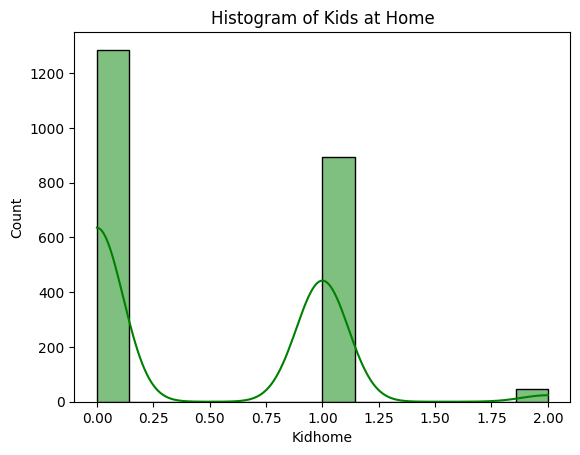

Probability:
0    0.576940
1    0.401525
2    0.021534
Name: Kidhome, dtype: float64

Expected value:
0.4445939883355765


In [41]:
sns.histplot(data['Kidhome'], kde = True,color='green')
plt.title('Histogram of Kids at Home')
plt.show()


# Calculate the probability of each income
probability = data['Kidhome'].value_counts(normalize=True)

# Calculate the expected value
expected_value = data['Kidhome'].mean()

# Print the results
print("Probability:")
print(probability)

print("\nExpected value:")
print(expected_value)

<b> In given subset of customers,most peoople either dont have kids at home or maximum of 1 teen at home.This means demography is old.
having nuclear families where they prefer to live with their spouse.

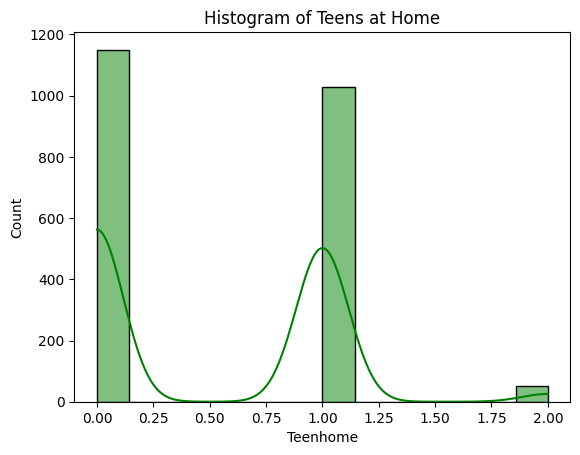

Probability:
0    0.515926
1    0.460745
2    0.023329
Name: Teenhome, dtype: float64

Expected value:
0.5074024226110363


In [42]:
sns.histplot(data['Teenhome'], kde = True,color='green')
plt.title('Histogram of Teens at Home')
plt.show()


# Calculate the probability of each income
probability = data['Teenhome'].value_counts(normalize=True)

# Calculate the expected value
expected_value = data['Teenhome'].mean()

# Print the results
print("Probability:")
print(probability)

print("\nExpected value:")
print(expected_value)

<b> In given subset of customers,most peoople either dont have teens at home or maximum of 1 teen at home.This means demography is old.
having nuclear families where they prefer to live with their spouse.

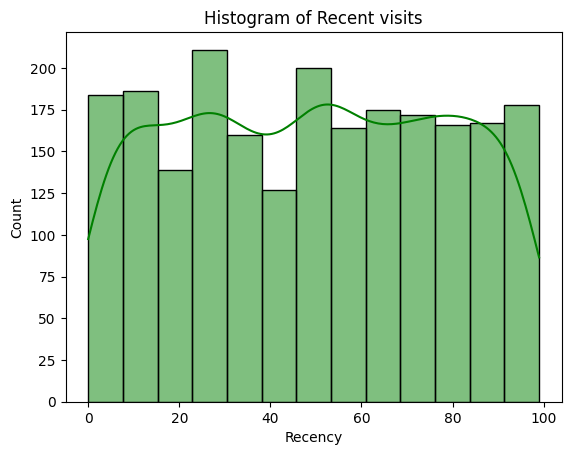

Probability of Recency is:
56    0.016599
30    0.014356
54    0.014356
46    0.013908
65    0.013459
        ...   
5     0.006729
59    0.006281
22    0.005832
7     0.005384
44    0.004935
Name: Recency, Length: 100, dtype: float64

Expected value:
49.10632570659489


In [43]:
sns.histplot(data['Recency'], kde = True,color='green')
plt.title('Histogram of Recent visits')
plt.show()


# Calculate the probability of each income
probability = data['Recency'].value_counts(normalize=True)

# Calculate the expected value
expected_value = data['Recency'].mean()

# Print the results
print("Probability of Recency is:")
print(probability)

print("\nExpected value:")
print(expected_value)

<b>From above histplot it is visible that expected value of visit is 50 days,which is not at all good for buisness.
Expected value should be below 30.as we assume most people visit superstore once in a month for grocery.
We can overcome this by offering tempting offers on weekdays.Offering goods with heavy discounts and taking feedaback from customers.what new they would like to buy from superstore which is currently not available.

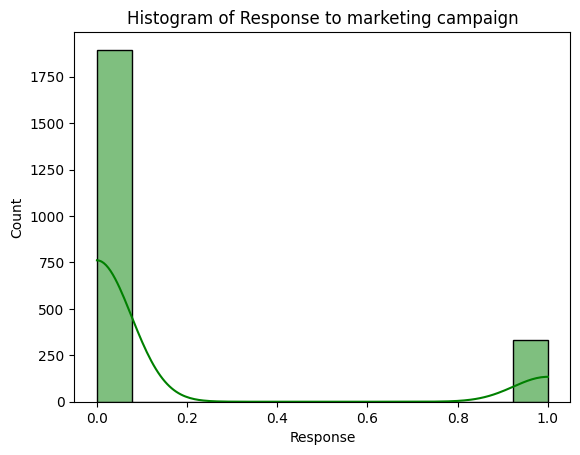

Probability:
0    0.850157
1    0.149843
Name: Response, dtype: float64

Expected value:
0.14984297891431134


In [44]:
sns.histplot(data['Response'], kde = True,color='green')
plt.title('Histogram of Response to marketing campaign')
plt.show()


# Calculate the probability of each income
probability = data['Response'].value_counts(normalize=True)

# Calculate the expected value
expected_value = data['Response'].mean()

# Print the results
print("Probability:")
print(probability)

print("\nExpected value:")
print(expected_value)

<b>From above we can say that response to marketing campaign wasnt satisfactory.
There are high chances of customers not choosing to sign for campaign.
We need to make change in marketing strategy.

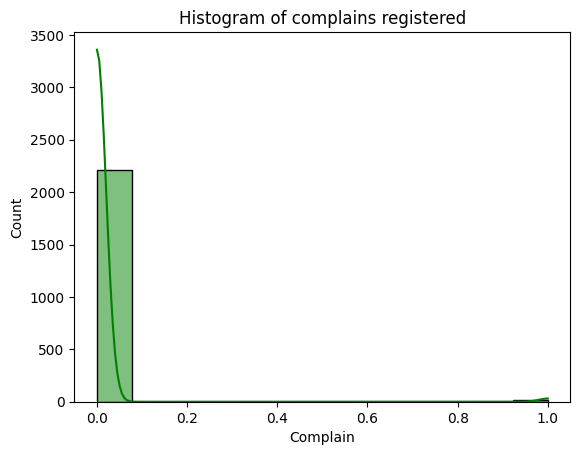

Probability:
0    0.991027
1    0.008973
Name: Complain, dtype: float64

Expected value:
0.008972633467922835


In [45]:
sns.histplot(data['Complain'], kde = True,color='green')
plt.title('Histogram of complains registered')
plt.show()


# Calculate the probability of each income
probability = data['Complain'].value_counts(normalize=True)

# Calculate the expected value
expected_value = data['Complain'].mean()

# Print the results
print("Probability:")
print(probability)

print("\nExpected value:")
print(expected_value)

<b>Probability of complains registred is very minimal comapred.
Expected value is also very low.
This are good signs for supermarket.

##Insights and Customer Segmentation 📈

- **Explore relationships between customer characteristics and spending habits. Segment customers based on their behaviors and characteristics.**

**Deliverables**:

- **Key insights regarding relationships between variables and distinct customer segments based on behaviors.**

  

<Axes: >

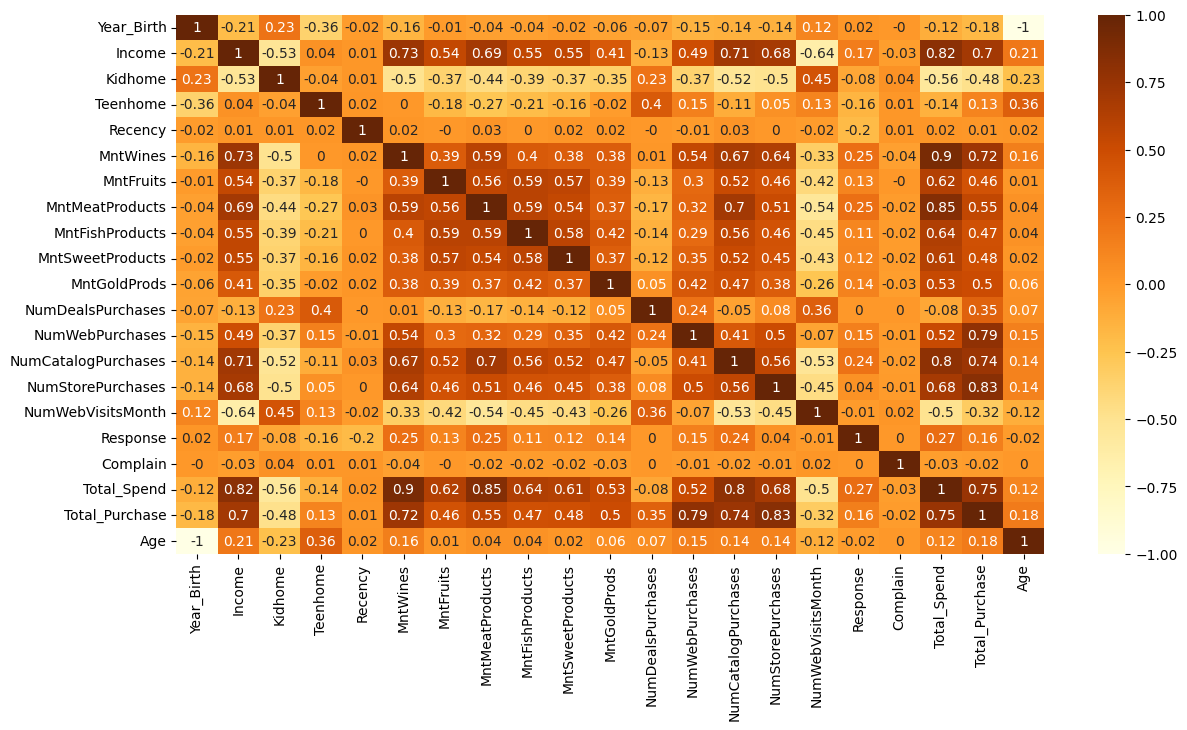

In [46]:
# Finding correlation between all numerical data
correlation = data.corr().round(2)
plt.figure(figsize = (14,7))
sns.heatmap(correlation, annot = True, cmap = 'YlOrBr')

<b>There is good corelation between income of customer and amount spend on wines.

Text(0.5, 1.0, 'Expenditure done by different educated groups')

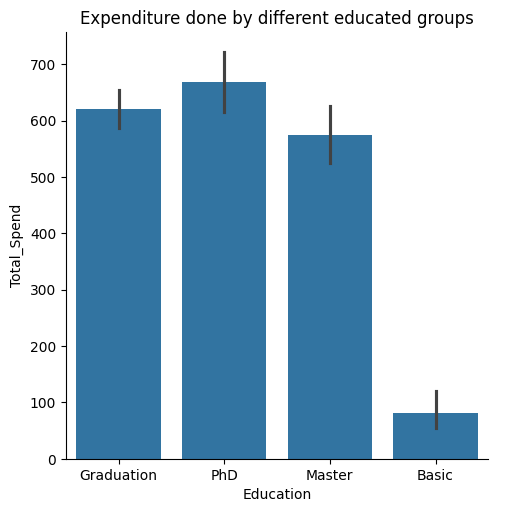

In [47]:
# Barplot of education Vs Total expenditure
sns.catplot(data=data,x='Education',y='Total_Spend',kind='bar')
plt.title('Expenditure done by different educated groups')

<b>Most spending on goods is done by those holding PhD in both single and committed groups.Followed by masters and graduation.As expected those with Basic education are far more unlikely to spend compared with others.

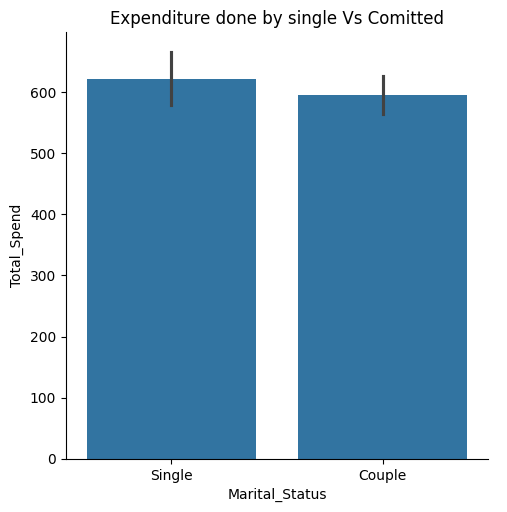

In [48]:

# Barplot of marital status Vs Total expenditure
sns.catplot(data=data,x='Marital_Status',y='Total_Spend',kind='bar')
plt.title('Expenditure done by single Vs Comitted')
plt.show()

<b>There is not much difference in spending done by single and married cutomers.

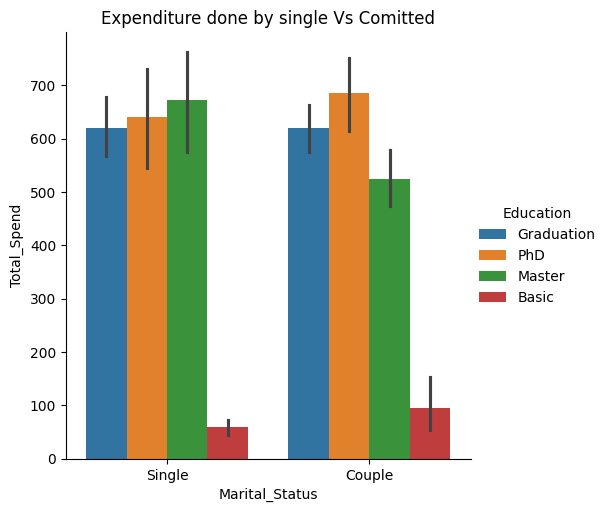

In [49]:
# Barplots showing expenditure done by single Vs Committed
sns.catplot(data=data,x='Marital_Status',y='Total_Spend',hue='Education',kind='bar')
plt.title('Expenditure done by single Vs Comitted')
plt.show()


<b>Most spending on goods is done by those holding PhD in both single and committed groups.Followed by masters and graduation.As expected those with Basic education are far more unlikely to spend compared with others.


<Axes: xlabel='Response', ylabel='count'>

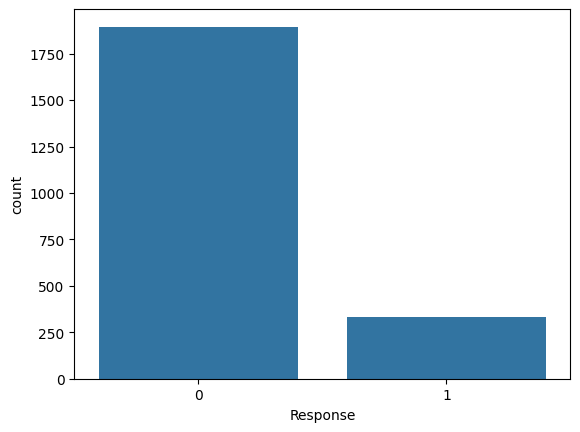

In [50]:
# count plot on single categorical variable
sns.countplot(x ='Response', data = data)

<b>Customers showing negative reposnse are far more than those giving any response.
We should  abandon current marketing strategy.

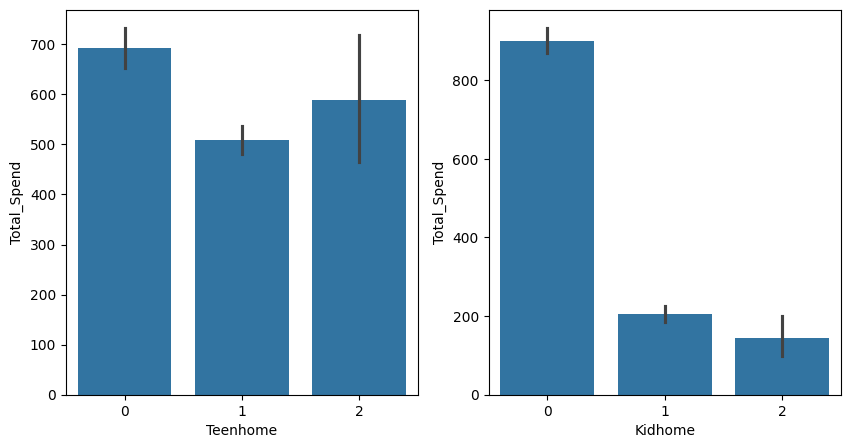

In [51]:
# Expenditure when teen at home vs Kids at home

fig, axs = plt.subplots(1, 2, figsize=(10, 5))

sns.barplot(data=data, x='Teenhome', y='Total_Spend', ax=axs[0])
sns.barplot(data=data, x='Kidhome', y='Total_Spend', ax=axs[1])

plt.show()

<b>Customers having no kids or teen at home are more likely to spend than those having kids.
customers with teen at home are more likely to spend than those having kids.

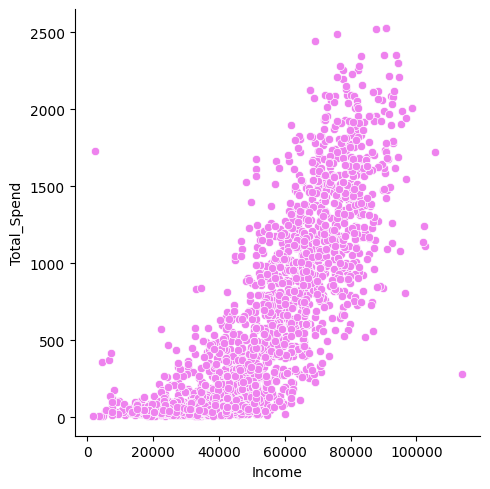

In [52]:
# Scatterplot to eastablish relationship between income and ability to spend
cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
g = sns.relplot(
    data=data,
    x="Income", y="Total_Spend",
    color='violet', sizes=(80, 200),
)

<b>We can see that income and the total amount spent have a positive correlation.
The total amount spent is not much different for customers with income in the range of 20K to 60K but the difference is significant for customers in the range of 60K to 100K.

<Axes: xlabel='MntGoldProds', ylabel='Count'>

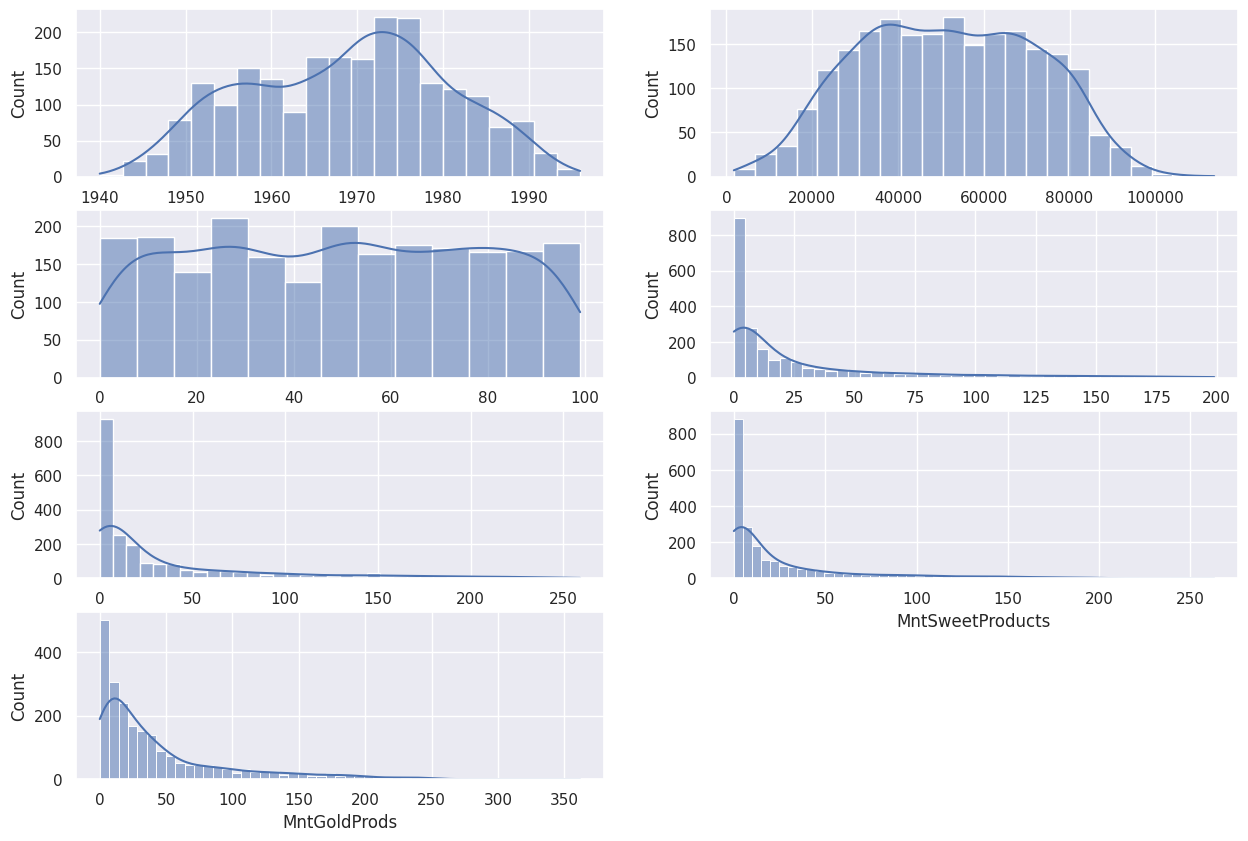

In [53]:
# histogram to understand relationship of continues data
plt.figure(figsize = (15,10))
sns.set(color_codes = True)
df=data.copy()

plt.subplot(4,2,1)
sns.histplot(data['Year_Birth'], kde = True)

plt.subplot(4,2,2)
sns.histplot(df['Income'], kde = True)

plt.subplot(4,2,3)
sns.histplot(df['Recency'], kde = True)

plt.subplot(4,2,4)
sns.histplot(df['MntFruits'], kde = True)

plt.subplot(4,2,5)
sns.histplot(df['MntFishProducts'], kde = True)

plt.subplot(4,2,6)
sns.histplot(df['MntSweetProducts'], kde = True)

plt.subplot(4,2,7)
sns.histplot(df['MntGoldProds'], kde = True)

<b>Looking at our continuous variables we can see that most of our customers are adults, followed by seniors, when we look at the variable Income we can see that we have a concentration of prices between 0 and 10000 with some data above that value, we can see that the variable Recency is well balanced, when we look at the amount spent on certain products, the higher the spend, the lower the amount of data.

<Axes: title={'center': 'Variable Complain'}, xlabel='Complain', ylabel='count'>

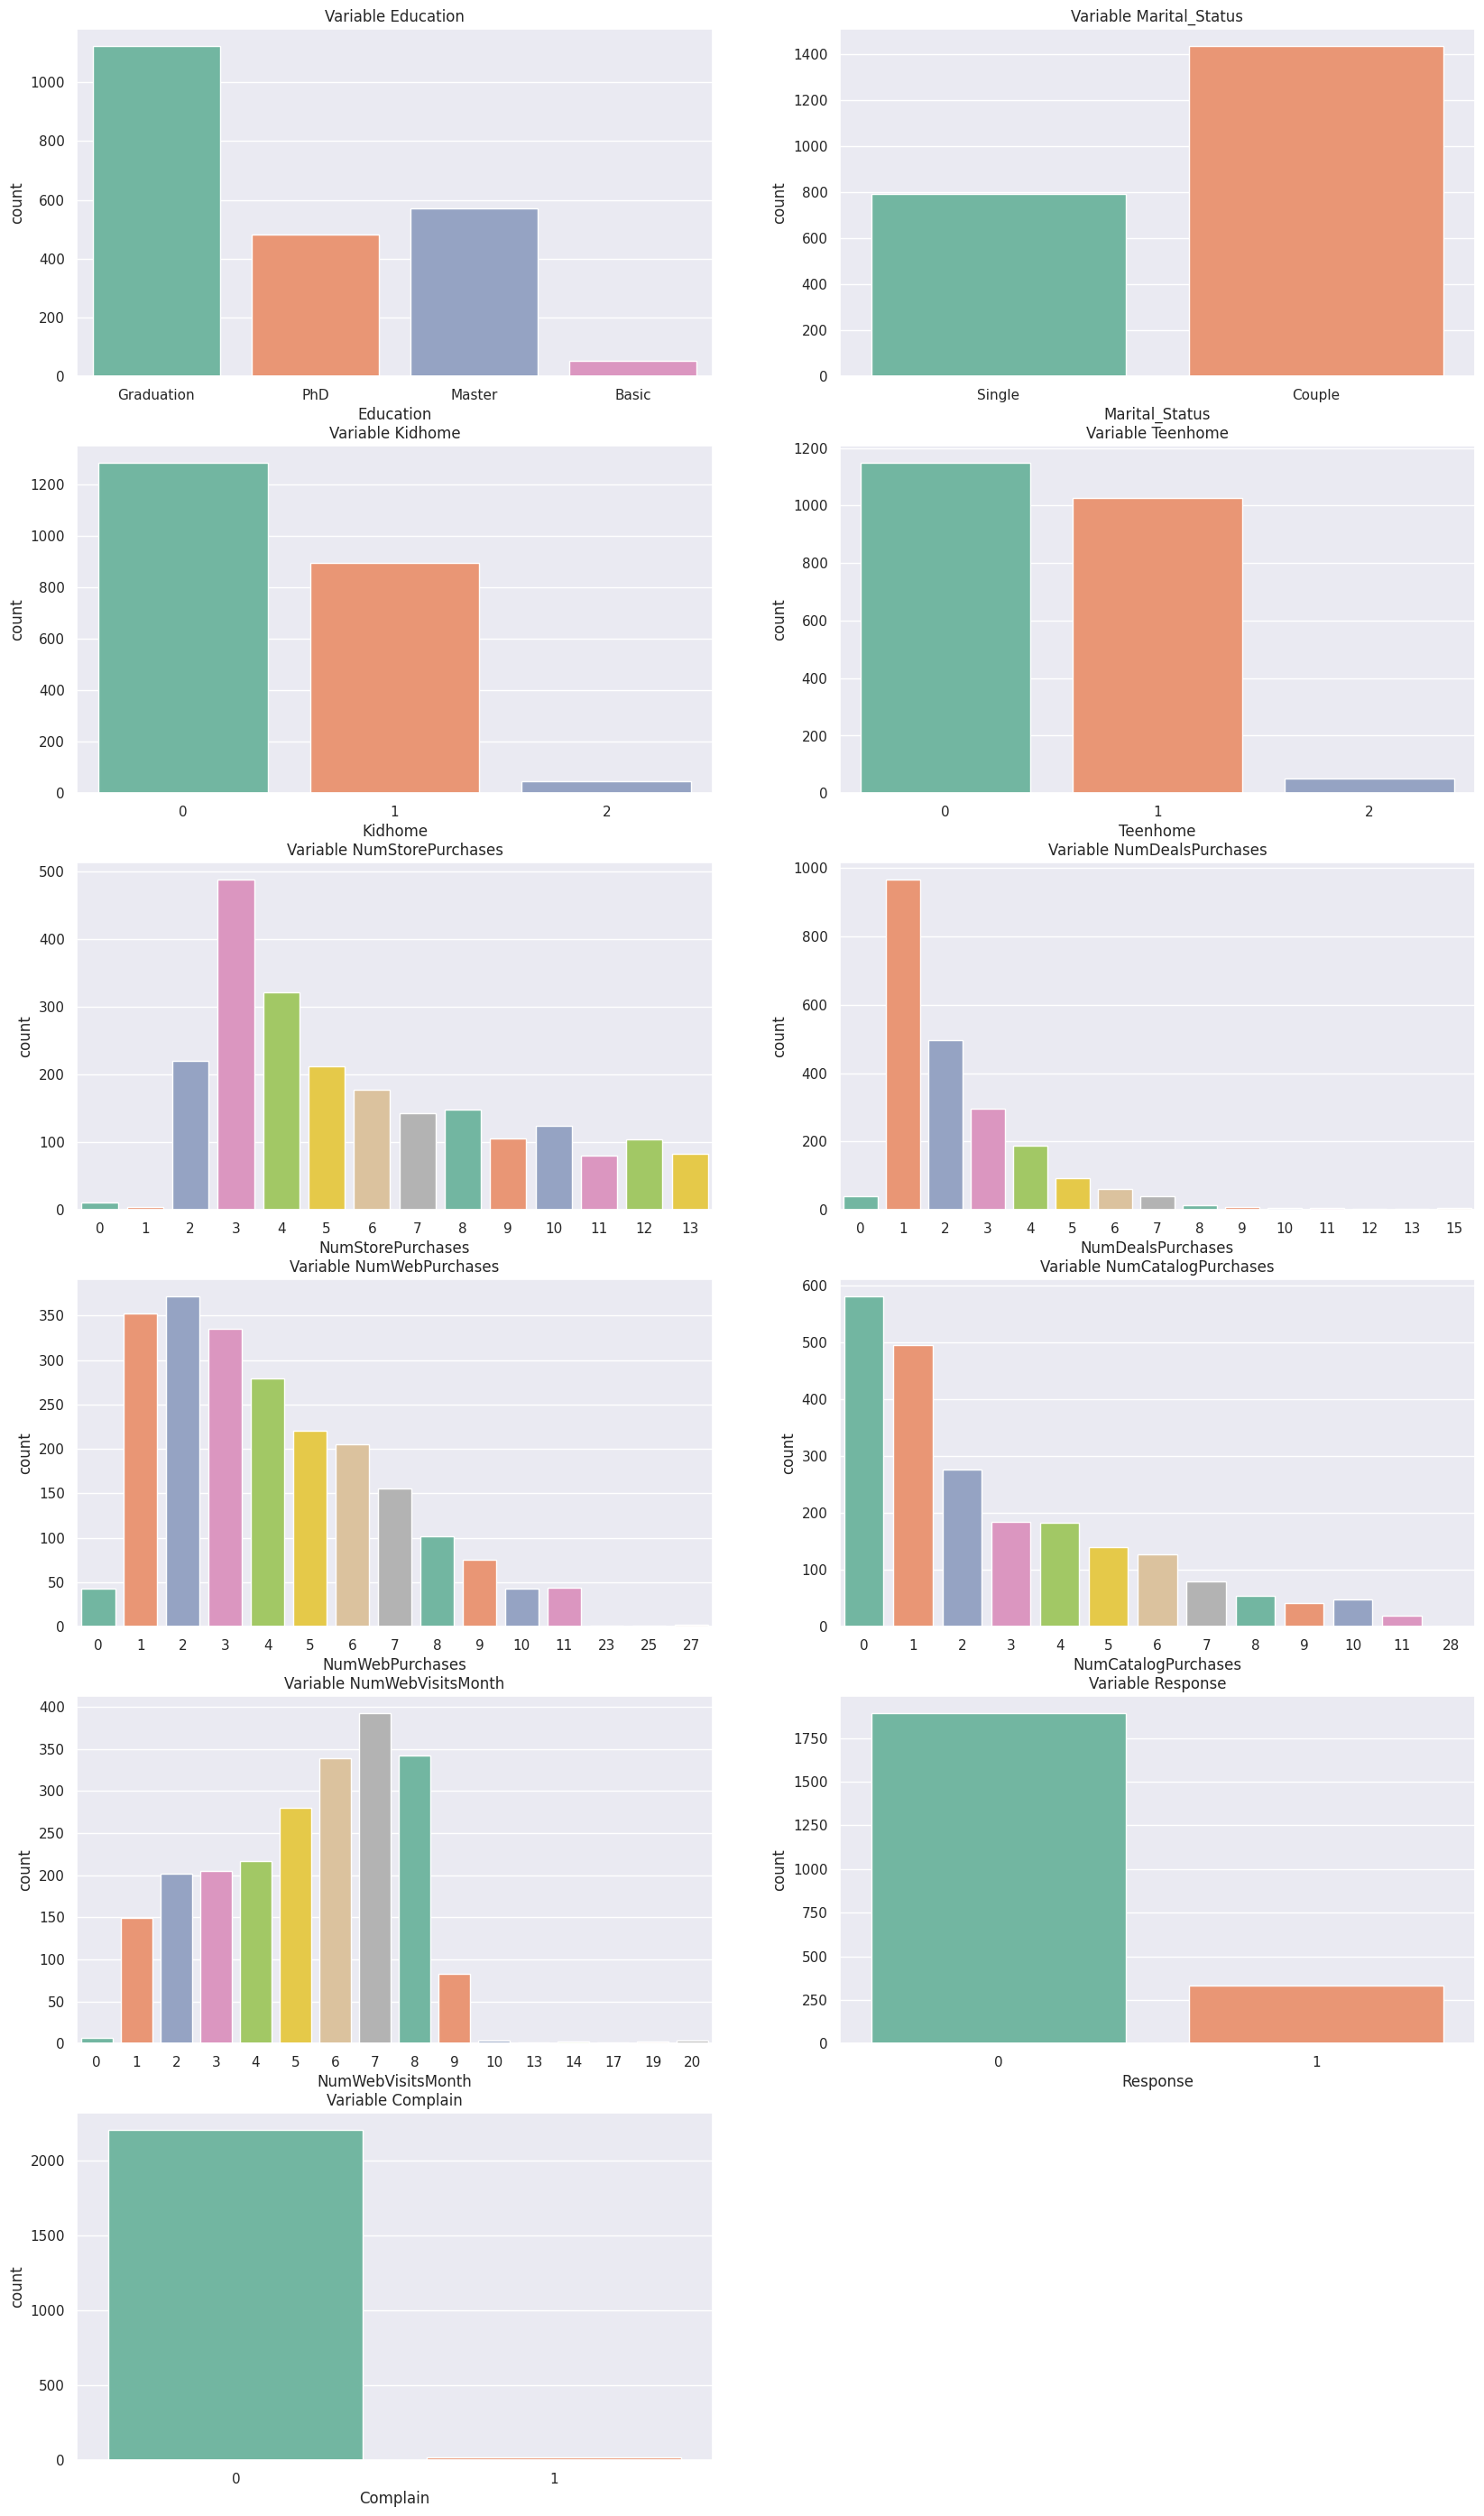

In [54]:
# Barplots to understand relationship of categorical data
plt.figure(figsize = (20,35))
df=data.copy()
plt.subplot(6,2,1)
plt.gca().set_title('Variable Education')
sns.countplot(x = 'Education', palette = 'Set2', data = df)

plt.subplot(6,2,2)
plt.gca().set_title('Variable Marital_Status')
sns.countplot(x = 'Marital_Status', palette = 'Set2', data = df)

plt.subplot(6,2,3)
plt.gca().set_title('Variable Kidhome')
sns.countplot(x = 'Kidhome', palette = 'Set2', data = df)

plt.subplot(6,2,4)
plt.gca().set_title('Variable Teenhome')
sns.countplot(x = 'Teenhome', palette = 'Set2', data = df)

plt.subplot(6,2,5)
plt.gca().set_title('Variable NumStorePurchases')
sns.countplot(x = 'NumStorePurchases', palette = 'Set2', data = df)

plt.subplot(6,2,6)
plt.gca().set_title('Variable NumDealsPurchases')
sns.countplot(x = 'NumDealsPurchases', palette = 'Set2', data = df)

plt.subplot(6,2,7)
plt.gca().set_title('Variable NumWebPurchases')
sns.countplot(x = 'NumWebPurchases', palette = 'Set2', data = df)

plt.subplot(6,2,8)
plt.gca().set_title('Variable NumCatalogPurchases')
sns.countplot(x = 'NumCatalogPurchases', palette = 'Set2', data = df)

plt.subplot(6,2,9)
plt.gca().set_title('Variable NumWebVisitsMonth')
sns.countplot(x = 'NumWebVisitsMonth', palette = 'Set2', data = df)

plt.subplot(6,2,10)
plt.gca().set_title('Variable Response')
sns.countplot(x = 'Response', palette = 'Set2', data = df)

plt.subplot(6,2,11)
plt.gca().set_title('Variable Complain')
sns.countplot(x = 'Complain', palette = 'Set2', data = df)

<b>Looking at our categorical variables we managed to get some views, most of our data are from graduates, although we have a lot of data from singles, they are usually married/cohabiting clients, the data is well divided between those who have children and those who do not, we can see that the greater the number of purchases in the month, the less data we have, it is also interesting to see that customers usually visit the site an average of 7 times a month, when we look at the Complain variable we see that we have few complaints, and looking at our variable target we can see that most of the data is negative response.

In [55]:
# New datframe to measure number of customers registered in that particular month and year
df = df[df['Dt_Customer'] != 'Not Available']



df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])
df['year'] = df['Dt_Customer'].dt.year
df['month'] = df['Dt_Customer'].dt.month
df['day'] = df['Dt_Customer'].dt.day


counts = df.value_counts(['year', 'month']).reset_index(name='count')
counts=counts.sort_values(by=['year','month'], ascending=True)
counts

<ipython-input-55-5a7b9a9395e2>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])
<ipython-input-55-5a7b9a9395e2>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year'] = df['Dt_Customer'].dt.year
<ipython-input-55-5a7b9a9395e2>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-do

,year,month,count
23,2012,7,2
0,2012,8,74
18,2012,9,51
6,2012,10,62
20,2012,11,49
21,2012,12,45
12,2013,1,56
2,2013,2,66
5,2013,3,63
16,2013,4,54


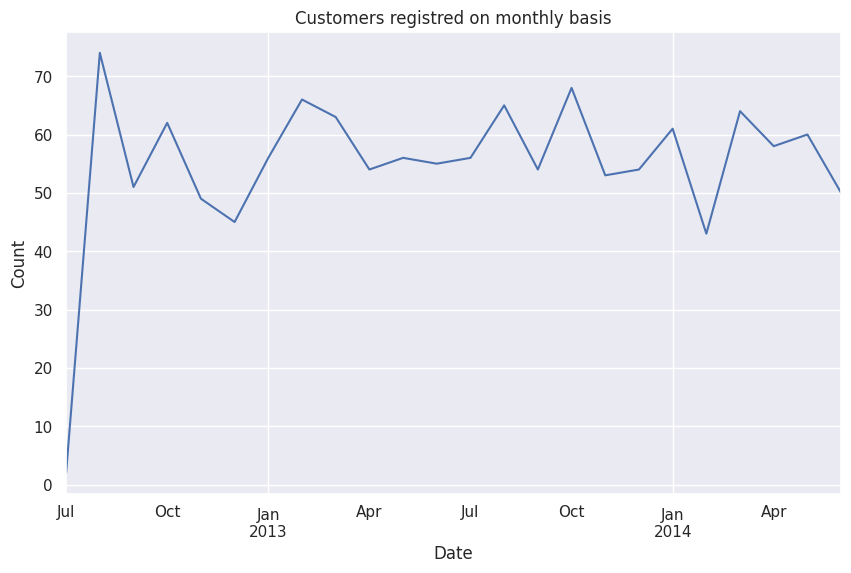

In [56]:
# Lineplot showing cutomers enrolled in differnt months
df=counts.copy()
df['date'] = pd.to_datetime(df[['year', 'month']].assign(day=1))
df.set_index('date', inplace=True)

df.plot(y='count', figsize=(10, 6), legend=None)
plt.title('Customers registred on monthly basis')
plt.xlabel('Date')
plt.ylabel('Count')
plt.show()


<b>There is volaitily in number of regiserations done month on month.There is significant decline in regsiterations from dec to january for both the years,which should not happen as this is holiday period and we should expect more registeration in this period.Reason for this may not be low footfall but not having adequate systems at place to get customers registred.It becomes tough to track customers if not registred.

##Observation


##Key Insights

*   The income distribution is multimodal with an expected value of around 50,000 USD.
*
The age distribution is left-skewed with an expected value of 54. This means that the majority of customers are over 50 years old.
*
The number of children at home distribution shows that most people either don't have kids at home or have a maximum of one teen at home.
*
The expected value of visits per customer is 50 days, which is not good for business. We should aim for an expected value of below 30 days.
*
We can improve customer visit frequency by offering tempting offers on weekdays, offering goods with heavy discounts, and taking feedback from customers on what new products they would like to see.
*
The probability of complaints registered is very low, which is a good sign of the supermarket's conduct.
*
Most spending on goods is done by those holding a PhD, followed by those with a master's degree or graduation.
*
There is not much difference in spending done by single and married customers.
Customers having no kids or teen at home are more likely to spend than those having kids.
*
Customers with a teen at home are more likely to spend than those having kids.
Income and the total amount spent have a positive correlation.
*
The total amount spent is not much different for customers with income in the range of 20K to 60K, but the difference is significant for customers in the range of 60K to 100K.



##Data Modelling

In [57]:
#Check for correlation between all features
print("*"*40+"Corelation Matrix"+"*"*40)

data.corr()
# print('/n')

****************************************Corelation Matrix****************************************


,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain,Total_Spend,Total_Purchase,Age
Year_Birth,1.000000,-0.211432,0.234469,-0.364148,-0.017956,-0.162628,-0.013360,-0.038417,-0.042064,-0.018938,...,-0.074089,-0.153410,-0.140002,-0.138852,0.119885,0.018918,-0.004380,-0.116090,-0.184704,-1.000000
Income,-0.211432,1.000000,-0.527402,0.042208,0.006638,0.728169,0.535305,0.693762,0.550047,0.549804,...,-0.131085,0.493610,0.706885,0.683460,-0.644405,0.174557,-0.027474,0.820222,0.697175,0.211432
Kidhome,0.234469,-0.527402,1.000000,-0.036461,0.009144,-0.498230,-0.373563,-0.443248,-0.388645,-0.371720,...,0.231266,-0.365123,-0.517305,-0.504817,0.448826,-0.080514,0.036294,-0.556996,-0.479945,-0.234469
Teenhome,-0.364148,0.042208,-0.036461,1.000000,0.016246,0.003899,-0.177128,-0.267046,-0.205301,-0.163651,...,0.395713,0.154624,-0.111976,0.048310,0.133056,-0.155726,0.007442,-0.138790,0.134168,0.364148
Recency,-0.017956,0.006638,0.009144,0.016246,1.000000,0.016797,-0.003376,0.026651,0.001694,0.023071,...,-0.002780,-0.010256,0.030805,0.001671,-0.020849,-0.199078,0.005404,0.022177,0.007586,0.017956
MntWines,-0.162628,0.728169,-0.498230,0.003899,0.016797,1.000000,0.387591,0.586156,0.398024,0.384885,...,0.013908,0.540786,0.673390,0.641490,-0.327949,0.246534,-0.036257,0.895919,0.720266,0.162628
MntFruits,-0.013360,0.535305,-0.373563,-0.177128,-0.003376,0.387591,1.000000,0.562744,0.593941,0.566545,...,-0.133856,0.295507,0.515184,0.462344,-0.424034,0.125192,-0.002988,0.615443,0.459973,0.013360
MntMeatProducts,-0.038417,0.693762,-0.443248,-0.267046,0.026651,0.586156,0.562744,1.000000,0.589813,0.544347,...,-0.165686,0.315014,0.703668,0.509984,-0.543223,0.247103,-0.020647,0.853435,0.548570,0.038417
MntFishProducts,-0.042064,0.550047,-0.388645,-0.205301,0.001694,0.398024,0.593941,0.589813,1.000000,0.578983,...,-0.141021,0.291781,0.564718,0.459031,-0.452835,0.110609,-0.019039,0.644886,0.473597,0.042064
MntSweetProducts,-0.018938,0.549804,-0.371720,-0.163651,0.023071,0.384885,0.566545,0.544347,0.578983,1.000000,...,-0.120900,0.346776,0.519687,0.447643,-0.430205,0.116545,-0.020632,0.605164,0.477262,0.018938


In [58]:
data.corr().unstack().sort_values(ascending=False).drop_duplicates()

Year_Birth         Year_Birth             1.000000
MntWines           Total_Spend            0.895919
MntMeatProducts    Total_Spend            0.853435
Total_Purchase     NumStorePurchases      0.831751
Total_Spend        Income                 0.820222
                                            ...   
NumWebVisitsMonth  NumCatalogPurchases   -0.528833
MntMeatProducts    NumWebVisitsMonth     -0.543223
Kidhome            Total_Spend           -0.556996
Income             NumWebVisitsMonth     -0.644405
Age                Year_Birth            -1.000000
Length: 211, dtype: float64

In [59]:
# Dropping duplicates if any
data.drop_duplicates(inplace=True)

In [60]:
#Dropping Features having correlation greater than 0.8
data.drop(['Year_Birth','MntWines','MntMeatProducts','NumStorePurchases','Income'],axis=1,inplace=True)

In [61]:
#Dropping features irrelevant for Data Modelling
data.drop(['Dt_Customer','Recency'],axis=1,inplace=True)

In [62]:
#One hot encoding for categorical features
one_hot_encoded_data=pd.get_dummies(data=data,columns=['Education','Marital_Status'])

In [63]:
one_hot_encoded_data.shape

one_hot_encoded_data.columns

# Checking if target feature is imbalanced
response_df=data['Response'].value_counts(normalize=True)*100
pd.DataFrame(response_df)

,Response
0,84.784736
1,15.215264


In [64]:
x=one_hot_encoded_data.drop('Response',axis=1)
y=one_hot_encoded_data['Response']

In [65]:
data.columns

Index(['Education', 'Marital_Status', 'Kidhome', 'Teenhome', 'MntFruits',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumWebVisitsMonth', 'Response', 'Complain', 'Total_Spend',
       'Total_Purchase', 'Age'],
      dtype='object')

In [66]:
#checking if dataset is imbalanced
response_df=y.value_counts(normalize=True)*100
response_df=pd.DataFrame(response_df)
response_df

,Response
0,84.784736
1,15.215264


<Axes: xlabel='Response', ylabel='count'>

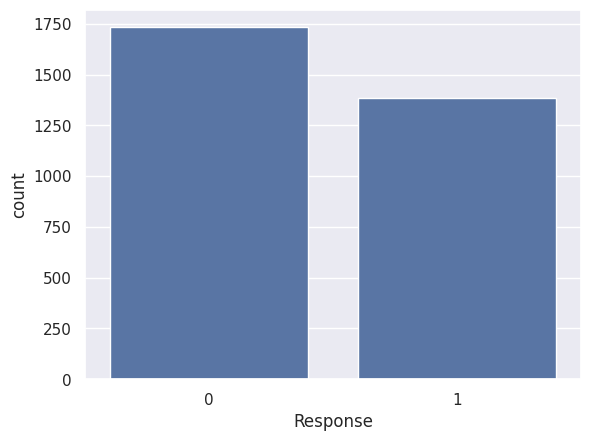

In [67]:
#Oversampling minority class to reduce imbalance
ros=RandomOverSampler(sampling_strategy=0.8)
x_resampled,y_resampled=ros.fit_resample(x,y)

#Countplot for checking if values are balanced
sns.countplot(x=y_resampled)

In [68]:
#Standardising independent features
scaler=StandardScaler()
x_standard=scaler.fit_transform(x_resampled)

print(x_standard)

[[-0.78980589 -0.8107578   1.74536411 ... -0.57747367 -1.18915377
   1.18915377]
 [-0.78980589 -0.8107578  -0.59866844 ... -0.57747367 -1.18915377
   1.18915377]
 [-0.78980589  1.05685932 -0.45660586 ... -0.57747367  0.84093414
  -0.84093414]
 ...
 [-0.78980589  1.05685932  0.67989477 ...  1.73168067  0.84093414
  -0.84093414]
 [-0.78980589 -0.8107578  -0.21983489 ...  1.73168067  0.84093414
  -0.84093414]
 [-0.78980589 -0.8107578   0.56150929 ... -0.57747367  0.84093414
  -0.84093414]]


In [69]:
#Splitting dataset in training and testing data
x_train, x_test, y_train, y_test = train_test_split(x_resampled,y_resampled, test_size=0.33, random_state=0)

In [70]:
#Standardising independent features
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

print(x_standard)

[[-0.78980589 -0.8107578   1.74536411 ... -0.57747367 -1.18915377
   1.18915377]
 [-0.78980589 -0.8107578  -0.59866844 ... -0.57747367 -1.18915377
   1.18915377]
 [-0.78980589  1.05685932 -0.45660586 ... -0.57747367  0.84093414
  -0.84093414]
 ...
 [-0.78980589  1.05685932  0.67989477 ...  1.73168067  0.84093414
  -0.84093414]
 [-0.78980589 -0.8107578  -0.21983489 ...  1.73168067  0.84093414
  -0.84093414]
 [-0.78980589 -0.8107578   0.56150929 ... -0.57747367  0.84093414
  -0.84093414]]


In [71]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((2089, 20), (1030, 20), (2089,), (1030,))

##Logistics Regression

In [72]:
#Logistics Regression
logreg=LogisticRegression()
param_grid={'solver':['lbfgs','liblinear','newton-cholesky'],'max_iter':[100,200,350,500]}


#Hyperparameter tuning for choosing best parameters
grid_search=GridSearchCV(estimator=logreg,
    param_grid=param_grid,
    n_jobs=-1,
    cv=20)


#Fitting grid search model over trainig data
grid_search.fit(x_train,y_train)


GridSearchCV(cv=20, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'max_iter': [100, 200, 350, 500],
                         'solver': ['lbfgs', 'liblinear', 'newton-cholesky']})

In [73]:
#Best hyperparameters and best score after fitting model
print("Best hyperparameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)


Best hyperparameters:  {'max_iter': 100, 'solver': 'lbfgs'}
Best score:  0.7486813186813187


In [74]:
#Classification Report
print('*'*20+"Classification Report for Logistics Regression"+"*"*20)
print("\t")
print (classification_report(y_test,grid_search.predict(x_test)))

********************Classification Report for Logistics Regression********************
	
              precision    recall  f1-score   support

           0       0.77      0.77      0.77       593
           1       0.69      0.68      0.68       437

    accuracy                           0.73      1030
   macro avg       0.73      0.73      0.73      1030
weighted avg       0.73      0.73      0.73      1030



In [75]:
y_pred=grid_search.predict(x_test)
y_pred.shape

(1030,)

In [76]:
#Checking accuracy of model
logreg_accuracy=metrics.accuracy_score(y_test, y_pred)
print(f"Accuracy of Logistics regression is {logreg_accuracy}")

Accuracy of Logistics regression is 0.7330097087378641


## Gaussian Naive Bayes Classifier

In [77]:
#fitting model over training data
classifier = GaussianNB()
classifier.fit(x_train, y_train)

GaussianNB()

In [78]:
y_pred=classifier.predict(x_test)

In [79]:
#Measuring Accuracy
cm = confusion_matrix(y_test, y_pred)
accuracy_NB = metrics.accuracy_score(y_test,y_pred)
accuracy_NB

0.658252427184466

In [80]:
#Classification Report
print('*'*20+"Classification Report for Logistics Regression"+"*"*20)
print("\t")
print (classification_report(y_test,y_pred))

********************Classification Report for Logistics Regression********************
	
              precision    recall  f1-score   support

           0       0.72      0.66      0.69       593
           1       0.59      0.66      0.62       437

    accuracy                           0.66      1030
   macro avg       0.65      0.66      0.65      1030
weighted avg       0.67      0.66      0.66      1030



In [81]:
GNB_accuracy=metrics.accuracy_score(y_test, y_pred)
print(f"Accuracy of Logistics regression is {GNB_accuracy}")

Accuracy of Logistics regression is 0.658252427184466


##Decision Tree Classifier

In [82]:
dt_model=DecisionTreeClassifier()

#Hyperparameter tuning for choosing best parameters
param_grid={'criterion':['gini','entropy'],'max_depth':np.arange(3,10),'min_samples_split':np.arange(2,6),'min_samples_leaf':np.arange(1,5),'max_features':['auto','sqrt','log2'],'random_state':[42]}
dt_model_grid=GridSearchCV(estimator=dt_model,
    param_grid=param_grid,
    n_jobs=-1,
    cv=10,)

#Fitting model over training Data
dt_model_grid.fit(x_train,y_train)


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([3, 4, 5, 6, 7, 8, 9]),
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': array([1, 2, 3, 4]),
                         'min_samples_split': array([2, 3, 4, 5]),
                         'random_state': [42]})

In [83]:
#Best Hyperparameters and score after running model
print("Best Hyperparameter:",dt_model_grid.best_params_)
print("\n")
print("Best Score:",dt_model_grid.best_score_)

Best Hyperparameter: {'criterion': 'gini', 'max_depth': 9, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 4, 'random_state': 42}


Best Score: 0.8051757453073242


In [84]:
y_pred=dt_model_grid.predict(x_test)

In [85]:
cm = confusion_matrix(y_test, y_pred)
accuracy_DT = metrics.accuracy_score(y_test,y_pred)
accuracy_DT

0.7708737864077669

In [86]:
print('*'*20+"Classification Report for Decision Tree Classifier"+"*"*20)
print("\t")
print (classification_report(y_test,y_pred))

********************Classification Report for Decision Tree Classifier********************
	
              precision    recall  f1-score   support

           0       0.87      0.71      0.78       593
           1       0.68      0.86      0.76       437

    accuracy                           0.77      1030
   macro avg       0.78      0.78      0.77      1030
weighted avg       0.79      0.77      0.77      1030



In [87]:
print(f"Accuracy of Decision Tree Classifier is  {accuracy_DT}")

Accuracy of Decision Tree Classifier is  0.7708737864077669


##Random Forest Classifier

In [88]:
#Hyperparameter tuning for choosing best parameters
param_grid={'n_estimators':[100,150,20,30],'criterion':['gini','entropy'],'max_depth':np.arange(3,6)}
rf_model=RandomForestClassifier()
rf_model_grid=GridSearchCV(estimator=rf_model,
    param_grid=param_grid,
    scoring='accuracy',
    n_jobs=-1,
    cv=20)

In [89]:
#Fitting model over training Data
rf_model_grid.fit(x_test,y_test)

GridSearchCV(cv=20, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([3, 4, 5]),
                         'n_estimators': [100, 150, 20, 30]},
             scoring='accuracy')

In [90]:
print("Best parameters are:",rf_model_grid.best_params_)

Best parameters are: {'criterion': 'gini', 'max_depth': 5, 'n_estimators': 20}


In [91]:
y_pred=rf_model_grid.predict(x_test)

In [92]:
#Classifiaction Report
print('*'*20+"Classification Report for Decision Tree Classifier"+"*"*20)
print("\t")
print (classification_report(y_test,y_pred))

********************Classification Report for Decision Tree Classifier********************
	
              precision    recall  f1-score   support

           0       0.82      0.92      0.87       593
           1       0.87      0.72      0.79       437

    accuracy                           0.83      1030
   macro avg       0.84      0.82      0.83      1030
weighted avg       0.84      0.83      0.83      1030



In [93]:
#Measuring accuracy of model
cm = confusion_matrix(y_test, y_pred)
accuracy_RF = metrics.accuracy_score(y_test,y_pred)
accuracy_RF

0.8349514563106796

In [94]:
print(f"Accuracy of Random Forest Classifier is  {accuracy_RF} using parameters criterion='entropy',max_depth=5,n_estimators=100")

Accuracy of Random Forest Classifier is  0.8349514563106796 using parameters criterion='entropy',max_depth=5,n_estimators=100


##Adaboost

In [95]:
#fitting model
adaboost_classifier=AdaBoostClassifier()
adaboost_classifier.fit(x_train,y_train)

AdaBoostClassifier()

In [96]:
y_pred=adaboost_classifier.predict(x_test)

In [97]:
#printing classification report
print('*'*20+"Classification Report for Adaboost Classifier"+"*"*20)
print("\t")
print (classification_report(y_test,y_pred))

********************Classification Report for Adaboost Classifier********************
	
              precision    recall  f1-score   support

           0       0.77      0.78      0.77       593
           1       0.69      0.68      0.69       437

    accuracy                           0.74      1030
   macro avg       0.73      0.73      0.73      1030
weighted avg       0.74      0.74      0.74      1030



In [98]:
#measuring accuracy of model
cm = confusion_matrix(y_test, y_pred)
accuracy_abc = metrics.accuracy_score(y_test,y_pred)
print(f"Accuracy of Adaboost Classifier is  {metrics.accuracy_score(y_test,y_pred)}")



Accuracy of Adaboost Classifier is  0.7368932038834951


##XgBoost

In [105]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
param_grid={'n_estimators':[100,150,180,200],'learning_rate':[0.001,0.01,0.1,1.0],'max_depth':[3,4,5,6],'random_state':[42]}
xgboost_cf = GradientBoostingClassifier()

#Hyperparameter tuning for medil training
# xgboost_cf_grid=GridSearchCV(estimator=xgboost_cf,param_grid=param_grid,n_jobs=-1,cv=10)


In [106]:
xgboost_cf.fit(x_train,y_train)

GradientBoostingClassifier()

In [109]:
y_pred=xgboost_cf.predict(x_test)

In [111]:


print('*'*20+"Classification Report for Xgboost Classifier"+"*"*20)
print("\t")
print(classification_report(y_test,y_pred))

********************Classification Report for Xgboost Classifier********************
	
              precision    recall  f1-score   support

           0       0.83      0.79      0.81       593
           1       0.73      0.78      0.75       437

    accuracy                           0.78      1030
   macro avg       0.78      0.78      0.78      1030
weighted avg       0.79      0.78      0.79      1030



In [112]:
#measuring accuracy
cm = confusion_matrix(y_test, y_pred)
accuracy_xgboost = metrics.accuracy_score(y_test,y_pred)
print(f"Accuracy of Xgboost Classifier is  {accuracy_xgboost}")

Accuracy of Xgboost Classifier is  0.7844660194174757


##KNN Classifier

In [113]:
knn_classifier = KNeighborsClassifier()
param_grid={"n_neighbors":[3,5,7,9,11],'algorithm':['auto','ball_tree','brute']}


#Hyperparameter tuning for medil training
knn_classifier_grid=GridSearchCV(estimator=knn_classifier,param_grid=param_grid,n_jobs=-1,cv=10)
knn_classifier_grid.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'algorithm': ['auto', 'ball_tree', 'brute'],
                         'n_neighbors': [3, 5, 7, 9, 11]})

In [114]:
print("Best Hyperparameters are:",knn_classifier_grid.best_params_)

Best Hyperparameters are: {'algorithm': 'auto', 'n_neighbors': 3}


In [115]:
y_pred=knn_classifier_grid.predict(x_test)

In [116]:
#Classification Report
print('*'*20+"Classification Report for KNN Classifier"+"*"*20)
print("\t")
print (classification_report(y_test,y_pred))

#Measuring Accuracy
cm = confusion_matrix(y_test, y_pred)
accuracy_KNN = metrics.accuracy_score(y_test,y_pred)
print(f"Accuracy of KNN Classifier is  {accuracy_KNN}")

********************Classification Report for KNN Classifier********************
	
              precision    recall  f1-score   support

           0       0.92      0.79      0.85       593
           1       0.76      0.91      0.83       437

    accuracy                           0.84      1030
   macro avg       0.84      0.85      0.84      1030
weighted avg       0.85      0.84      0.84      1030

Accuracy of KNN Classifier is  0.8378640776699029


##Model Selection

In [117]:
#Making dictionary of classification models and their respective accuracy
Model_selection={"KNN Classifier":accuracy_KNN,'XgBoost Classsifier':accuracy_xgboost,'AdaBoost Classifier':accuracy_abc,'Random Forest Classifier':accuracy_RF,'Decision Tree Classifier':accuracy_DT,'Naive Bayes Classifier':GNB_accuracy,'Logistics Regression':logreg_accuracy}

In [125]:
#Round off value to 2 decimal
Model_selection_dict={key:round(value*100,2) for key,value in Model_selection.items()}
# Model_selection_dict.sort

In [126]:
#Making Datframe from Dictionary
Model_selection_df=pd.DataFrame([Model_selection_dict])

#Renaming column and sorting in descending order
Model_selection_df_transposed=Model_selection_df.transpose()
Model_selection_df_transposed.rename(columns={0:'Accuracy'},inplace=True)
Model_selection_df_transposed.sort_values(by=['Accuracy'],ascending=False)

,Accuracy
KNN Classifier,83.79
Random Forest Classifier,83.50
XgBoost Classsifier,78.45
Decision Tree Classifier,77.09
AdaBoost Classifier,73.69
Logistics Regression,73.30
Naive Bayes Classifier,65.83
